## Mall Customers Clustering Analysis 

## Importing the libraries

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## Import the dataset
https://www.kaggle.com/shwetabh123/mall-customers

In [29]:
dataset = pd.read_csv('C:/Users/binayak/Videos/Machine Learning/Clustering/Hierarchical/Mall_customers.csv')

In [30]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


There is not a dependent variable apriori when doing K Means clustering. Here all the colomns represent features which will be used to find patterns in the data. these patterns are actually clusters or segments in data which will be gathered by similarities.

## Encoding the Genre 

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],
                       remainder='passthrough')

In [33]:
X = dataset.iloc[:,1:].values

In [34]:
X[:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

## Encoding the Genre 

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],
                       remainder='passthrough')

In [36]:
X= np.array(ct.fit_transform(X))

In [37]:
X[:5]

array([[0.0, 1.0, 19, 15, 39],
       [0.0, 1.0, 21, 15, 81],
       [1.0, 0.0, 20, 16, 6],
       [1.0, 0.0, 23, 16, 77],
       [1.0, 0.0, 31, 17, 40]], dtype=object)

## Using the Dendogram to find the optimal number of clusters 

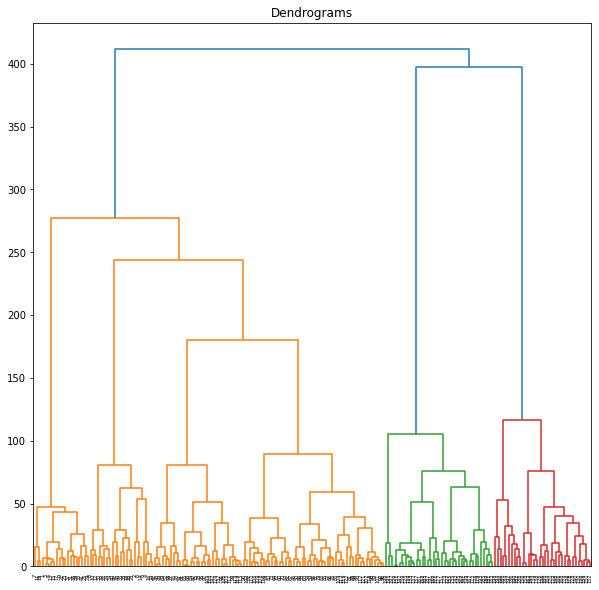

In [38]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot

pyplot.figure(figsize=(10, 10))  
pyplot.title("Dendrograms")  
dend = sch.dendrogram(shc.linkage(X, method='ward'))

From Dendogram it is clear that the number of optimal clusters are 3 

## Training the Hierachical Clustering Model on the dataset
class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)

In [39]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hac= hac.fit_predict(X)

In [40]:
y_hac

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [41]:
y_hac.shape

(200,)

In [42]:
y_hac_ser = pd.Series(y_hac)
y_hac_ser

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    1
197    2
198    1
199    2
Length: 200, dtype: int32

In [43]:
data = pd.concat([dataset,y_hac_ser],axis=1,sort=False)

In [44]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,0
9,10,Female,30,19,72,0


In [45]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 0],
      dtype='object')

In [46]:
data.rename(columns={0:'Cluster'},inplace=True)

In [47]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,0
9,10,Female,30,19,72,0


In [48]:
data['Cluster'].unique() # shows the clusters

array([0, 2, 1], dtype=int32)

In [61]:
data_cluster = data.groupby(['Cluster']).mean()

In [66]:
data_cluster.iloc[:,1:]

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,39.968254,44.833333,49.460317
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205


Thus the 3 clusters are:

0 : Persons with average age in their late 30s and having low annual income but with a average spending score 

1 : Persons with average age in their early 40s and having high annual income but with a low spending score 

2 : Persons with average age in their early 30s and having high annual income but with a good spending score 